In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# **1.Linear**

In [ ]:
# Linear activation function (identity function)
def linear_activation(x):
    return x

In [ ]:
# 1. Linear Activation (Identity function)
# nn: Used to create learnable layers; no parameters here for activation
linear_nn = nn.Identity()  # No transformation; output = input

# **2. threshold Function**

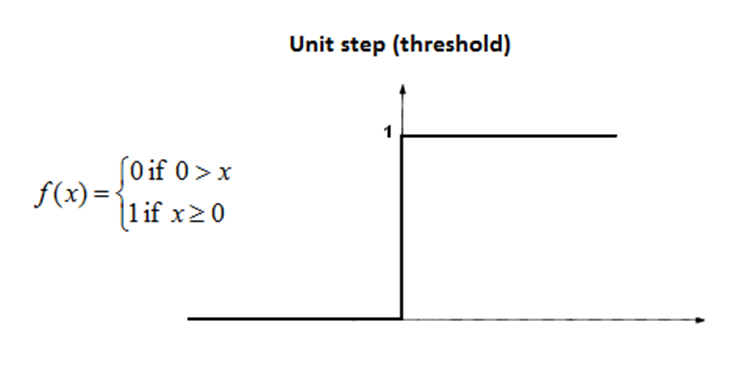

In [ ]:
# Threshold activation function
def threshold_activation(x, threshold=0.5, value=0):
    return torch.where(x > threshold, x, torch.tensor(value, dtype=x.dtype))

In [ ]:
# 2. Threshold Function
# nn: Applies a threshold where values below a set value are replaced
threshold_nn = nn.Threshold(threshold=0.5, value=-1)  # Parameters:
# - threshold: Values below this will be replaced
# - value: Replacement value for inputs below the threshold

In [ ]:
# F: Functional version of Threshold
threshold_f = F.threshold(x, threshold=0.5, value=-1)
# Parameters:
# - x: Input tensor
# - threshold: Threshold value
# - value: Replacement value for inputs below the threshold

# **3.sigmoid function**

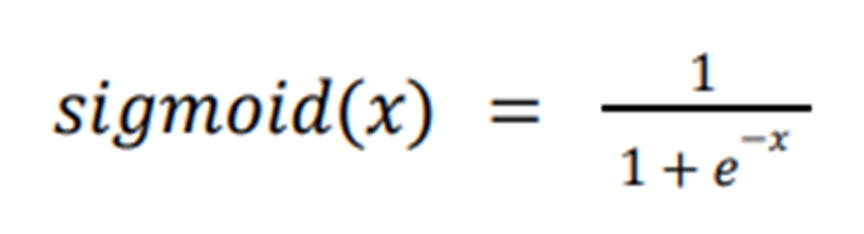

In [ ]:
# Sigmoid activation function
def sigmoid_activation(x):
    return 1 / (1 + torch.exp(-x))

In [ ]:
# 3. Sigmoid Function
# nn: Applies the sigmoid function element-wise
sigmoid_nn = nn.Sigmoid()  # No parameters

In [ ]:
# F: Functional version of Sigmoid
sigmoid_f = torch.sigmoid(x)  # Equivalent to F.sigmoid(x)

# **4.tanh function**

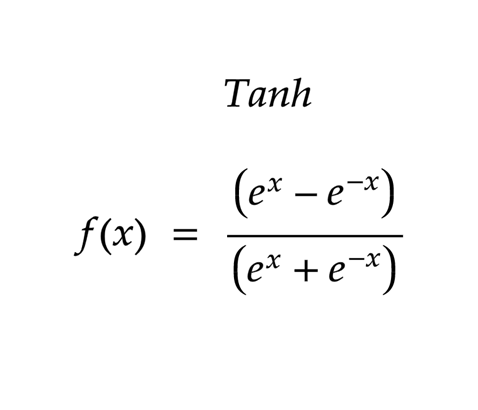

In [ ]:
# Tanh activation function
def tanh_activation(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

In [ ]:
# 4. Tanh Function
# nn: Applies the hyperbolic tangent function element-wise
tanh_nn = nn.Tanh()  # No parameters

In [ ]:
# F: Functional version of Tanh
tanh_f = torch.tanh(x)  # Equivalent to F.tanh(x)

# **5.softmax function**

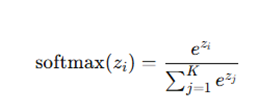

In [ ]:
# Softmax activation function
def softmax_activation(x):
    exp_x = torch.exp(x - torch.max(x))  # For numerical stability
    return exp_x / torch.sum(exp_x, dim=-1, keepdim=True)

In [ ]:
# 5. Softmax Function
# nn: Applies the softmax function along a specified dimension
softmax_nn = nn.Softmax(dim=-1)  # Parameters:
# - dim: Dimension along which softmax is computed

In [ ]:
# F: Functional version of Softmax
softmax_f = F.softmax(x, dim=-1)
# Parameters:
# - x: Input tensor
# - dim: Dimension along which softmax is computed

# **6.ReLU (Rectified Linear Unit)**

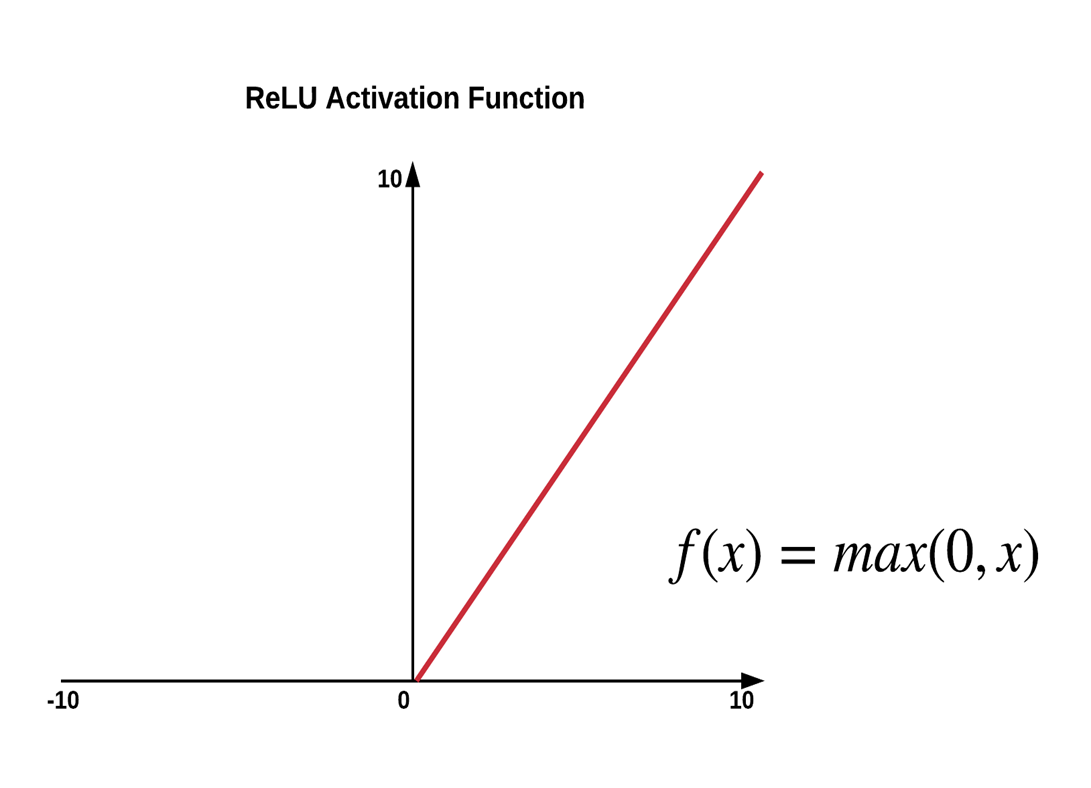

In [ ]:
# ReLU activation function
def relu_activation(x):
    return torch.maximum(x, torch.tensor(0, dtype=x.dtype))

In [ ]:
# 6. ReLU (Rectified Linear Unit)
# nn: Applies the ReLU activation function
relu_nn = nn.ReLU()  # Parameters:
# - inplace: If True, modifies the input tensor directly (default: False)

In [ ]:
# F: Functional version of ReLU
relu_f = F.relu(x, inplace=False)
# Parameters:
# - x: Input tensor
# - inplace: If True, modifies the input tensor directly (default: False)

# **7.LeakyRelu(LReLU)**

torch.where(**condition**, **value_if_true**, **value_if_false**)

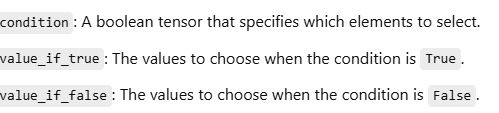

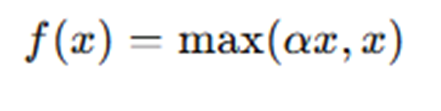

In [ ]:
# Leaky ReLU activation function
def leaky_relu_activation(x, negative_slope=0.01):
    return torch.where(x > 0, x, negative_slope * x)

In [ ]:
# 7. Leaky ReLU (LReLU)
# nn: Applies Leaky ReLU activation
leaky_relu_nn = nn.LeakyReLU(negative_slope=0.01, inplace=False)  # Parameters:
# - negative_slope: Controls the angle of the negative slope (default: 0.01)
# - inplace: If True, modifies the input tensor directly (default: False)

In [ ]:
# F: Functional version of Leaky ReLU
leaky_relu_f = F.leaky_relu(x, negative_slope=0.01, inplace=False)
# Parameters:
# - x: Input tensor
# - negative_slope: Controls the angle of the negative slope (default: 0.01)
# - inplace: If True, modifies the input tensor directly (default: False)

# **8.Parametric ReLU (PReLU)**

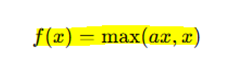

In [ ]:
# Parametric ReLU (PReLU) activation function
def prelu_activation(x, a):
    return torch.where(x > 0, x, a * x)

In [ ]:
# 8. Parametric ReLU (PReLU)
# nn: Applies PReLU activation
prelu_nn = nn.PReLU(num_parameters=1, init=0.25)  # Parameters:
# - num_parameters: Number of learnable slope parameters (default: 1)
# - init: Initial value of the learnable slope parameters (default: 0.25)

# **9. Exponential Linear Unit (ELU)**

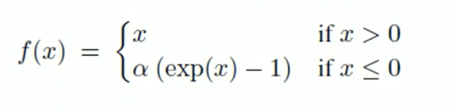

In [ ]:
# Exponential Linear Unit (ELU) activation function
def elu_activation(x, alpha=1.0):
    return torch.where(x > 0, x, alpha * (torch.exp(x) - 1))

In [ ]:
# 9. Exponential Linear Unit (ELU)
# nn: Applies ELU activation
elu_nn = nn.ELU(alpha=1.0, inplace=False)  # Parameters:
# - alpha: Scaling factor for negative inputs (default: 1.0)
# - inplace: If True, modifies the input tensor directly (default: False)

In [ ]:
# F: Functional version of ELU
elu_f = F.elu(x, alpha=1.0, inplace=False)
# Parameters:
# - x: Input tensor
# - alpha: Scaling factor for negative inputs (default: 1.0)
# - inplace: If True, modifies the input tensor directly (default: False)

# **10. Scaled Exponential Linear Unit (SELU)**

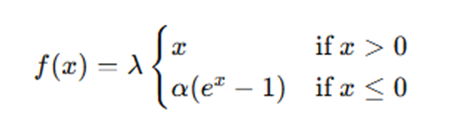

In [ ]:
# Scaled Exponential Linear Unit (SELU) activation function
def selu_activation(x, lambda_=1.0507, alpha=1.67326):
    return lambda_ * torch.where(x > 0, x, alpha * (torch.exp(x) - 1))

In [ ]:
# 10. Scaled Exponential Linear Unit (SELU)
# nn: Applies SELU activation
selu_nn = nn.SELU(inplace=False)  # Parameters:
# - inplace: If True, modifies the input tensor directly (default: False)

In [ ]:
# F: Functional version of SELU
selu_f = F.selu(x, inplace=False)
# Parameters:
# - x: Input tensor
# - inplace: If True, modifies the input tensor directly (default: False)

# **11. Swish function**

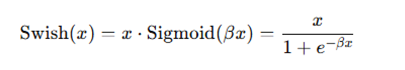

In [ ]:
# Swish activation function
def swish_activation(x, beta=1.0):
    return x * torch.sigmoid(beta * x)

# **12.Softplus**

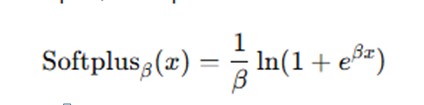

In [ ]:
# Softplus activation function
def softplus_activation(x, beta=1.0, threshold=20.0):
    # Avoid numerical instability by applying threshold
    return torch.where(beta * x > threshold, x, (1 / beta) * torch.log(1 + torch.exp(beta * x)))

In [ ]:
# 12. Softplus Function
# nn: Applies the Softplus activation function
softplus_nn = nn.Softplus(beta=1.0, threshold=20.0)  # Parameters:
# - beta: The β parameter, controls the smoothness (default: 1.0)
# - threshold: Threshold to avoid numerical instability (default: 20.0)

In [ ]:
# F: Functional version of Softplus
softplus_f = F.softplus(x, beta=1.0, threshold=20.0)
# Parameters:
# - x: Input tensor
# - beta: The β parameter, controls the smoothness (default: 1.0)
# - threshold: Threshold to avoid numerical instability (default: 20.0)

# **13.Mish**

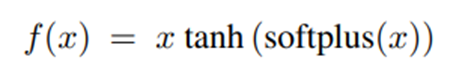

In [ ]:
# Mish activation function
def mish_activation(x):
    return x * torch.tanh(torch.nn.functional.softplus(x))

In [ ]:
Mish=nn.Mish(inplace=False)